# Background handling

We experiment with background modeling and subtraction. Initial goal is to allow peak finding over the entire image with a single set of parameters. Eventually we will use results gleaned from here, to build the background-handling pipeline step.

In [1]:
# %matplotlib notebook
import os, glob

import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from astropy.convolution import Gaussian2DKernel, interpolate_replace_nans
from astropy.stats import SigmaClip
from photutils import Background2D, MedianBackground, ModeEstimatorBackground

import rawpy

from datapath import DATA

/var/folders/98/9tkbspjx0_9ggcp3rrpjw10w0000gn/T/ipykernel_3976/3267580594.py:12: DeprecationWarning: `photutils.Background2D` is a deprecated alias for `photutils.background.Background2D` and will be removed in the future. Instead, please use `from photutils.background import Background2D` to silence this warning.
  from photutils import Background2D, MedianBackground, ModeEstimatorBackground
/var/folders/98/9tkbspjx0_9ggcp3rrpjw10w0000gn/T/ipykernel_3976/3267580594.py:12: DeprecationWarning: `photutils.MedianBackground` is a deprecated alias for `photutils.background.MedianBackground` and will be removed in the future. Instead, please use `from photutils.background import MedianBackground` to silence this warning.
  from photutils import Background2D, MedianBackground, ModeEstimatorBackground
/var/folders/98/9tkbspjx0_9ggcp3rrpjw10w0000gn/T/ipykernel_3976/3267580594.py:12: DeprecationWarning: `photutils.ModeEstimatorBackground` is a deprecated alias for `photutils.background.ModeEsti

In [2]:
fname = os.path.join(DATA,'astrophotography_data/MilkyWayPrettyBoy/12800/light/DSC03779.ARW')

In [3]:
raw = rawpy.imread(fname)
rgb = raw.postprocess()

red = rgb[::,::,0]
green = rgb[::,::,1]
blue = rgb[::,::,2]

red1 = red # * raw.camera_whitebalance[0] / raw.camera_whitebalance[1]
green1 = green
blue1 = blue # * raw.camera_whitebalance[2] / raw.camera_whitebalance[1]

gray_rgb_image = red1/3. + green1/3. + blue1/3.

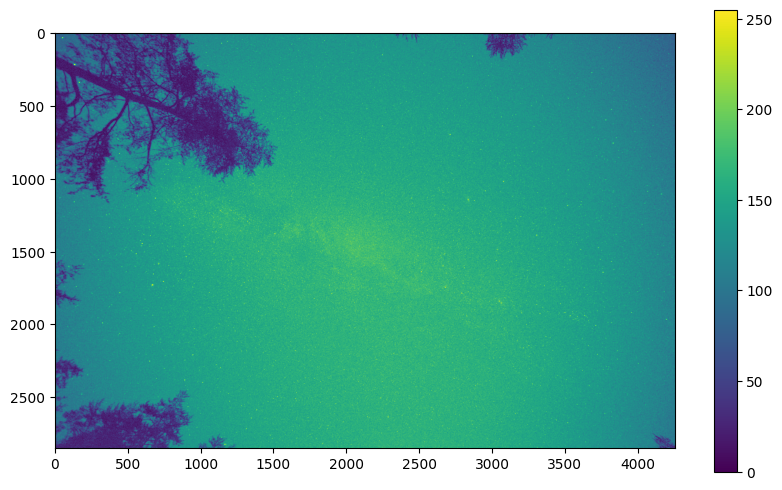

In [ ]:
plt.figure(figsize=[10, 6])
plt.imshow(gray_rgb_image)
plt.colorbar()

In [5]:
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(gray_rgb_image, (100, 100), filter_size=(5, 5), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

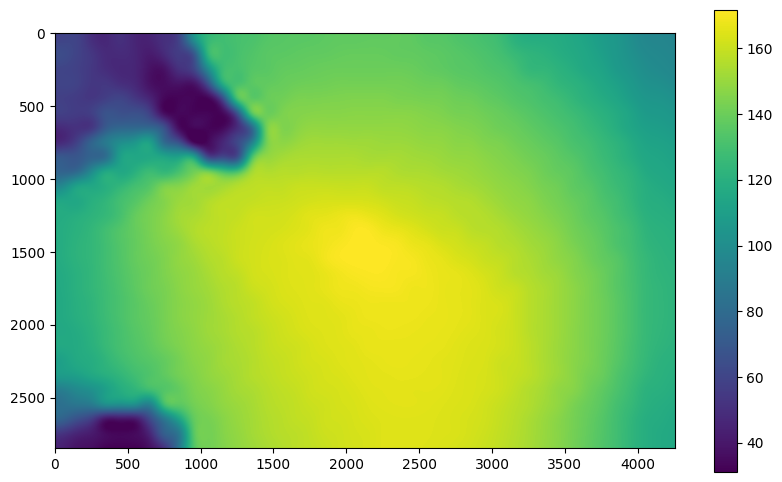

In [6]:
plt.figure(figsize=[10, 6])
plt.imshow(bkg.background)
plt.colorbar()

In [7]:
subtracted = gray_rgb_image - bkg.background

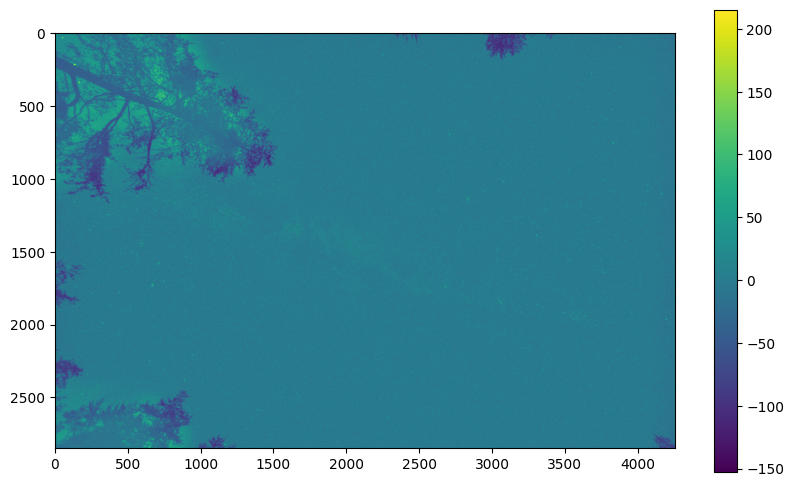

In [8]:
plt.figure(figsize=[10, 6])
plt.imshow(subtracted)
plt.colorbar()

In [9]:
from photutils import DAOStarFinder
daofind = DAOStarFinder(fwhm=7.0, threshold=18.*bkg.background_rms_median)  
sources = daofind(subtracted)  

# Must try find_peaks based on an input list.


/var/folders/98/9tkbspjx0_9ggcp3rrpjw10w0000gn/T/ipykernel_3976/3436140395.py:1: DeprecationWarning: `photutils.DAOStarFinder` is a deprecated alias for `photutils.detection.DAOStarFinder` and will be removed in the future. Instead, please use `from photutils.detection import DAOStarFinder` to silence this warning.
  from photutils import DAOStarFinder


In [10]:
sources  

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,2076.7461822970085,25.966960661411484,0.3639468060519503,0.2671396249283743,0.1757232183334212,81,0.0,117.77805086112252,1.2363806404962314,-0.23038049042922848
2,2466.4653302898632,35.577913966953155,0.43510145929094046,0.11463694821760151,0.475174273310015,81,0.0,118.3670826544232,1.238769992379063,-0.2324766914575335
3,1743.0324762985374,37.839715289346906,0.5208777921369941,0.43639123344307046,-0.19469157695593853,81,0.0,119.12897990073412,1.0059615976985388,-0.0064535049161975055
4,4131.13189431384,42.14517623324272,0.5296612499413015,-0.7995576989372741,-0.20100749153307068,81,0.0,159.41975193021688,1.2982176699623917,-0.28336878997832043
5,1847.810295297349,51.509144997466706,0.39607132304146253,0.025218558540379247,0.22119422989941062,81,0.0,118.33623539563939,1.1040732367441646,-0.10749470626132919
6,1181.4758754273466,56.18029683641355,0.31681520695143617,0.7038085285419364,-0.49612693133105235,81,0.0,125.89643938492836,1.227026202065901,-0.22213459200727376
7,1142.4107319465438,71.04839028614205,0.3589474367296262,0.5600260351592324,0.039196274823796826,81,0.0,126.06274240369595,1.1018995655379806,-0.1053550295734196
8,1621.2893208710689,77.31736120817659,0.4557407000712893,0.5610103527246931,0.10312032642571343,81,0.0,119.22196470432257,1.0726906389365407,-0.07618622668899322
9,3866.529246429918,98.24429311750475,0.47121158306988814,-0.4889632034244077,-0.31197230376686996,81,0.0,140.16840511546076,1.1450724679583533,-0.14708243162101584


/var/folders/98/9tkbspjx0_9ggcp3rrpjw10w0000gn/T/ipykernel_3976/3752906152.py:1: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture


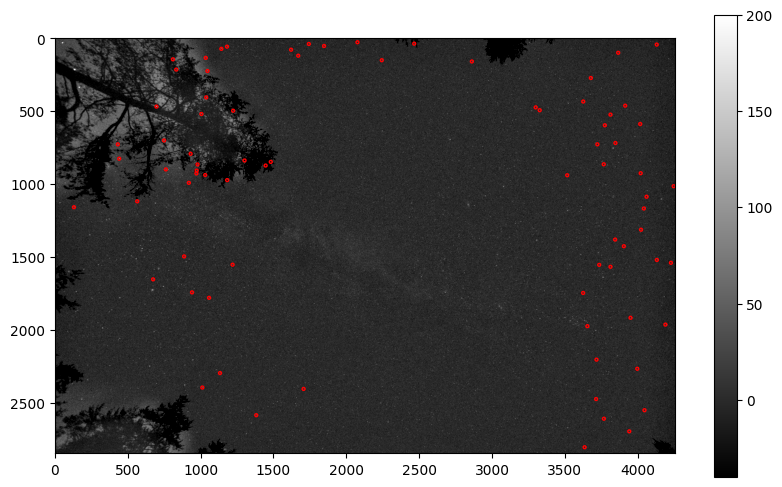

In [11]:
from photutils import CircularAperture
positions = [(x,y) for x,y in zip(sources['xcentroid'], sources['ycentroid'])]
apertures = CircularAperture(positions, r=10.)
plt.figure(figsize=[10, 6])
plt.imshow(subtracted, vmin=-40, vmax=200, cmap=cm.gray)
plt.colorbar()
ap = apertures.plot(color='red')

# Alternate background processing

Here, we perform a band-wise background subtraction, by first splitting the raw array into its R,G,B subarrays, then fitting and subtracting the background independently on each subarray, and finally, combining the 3 subarrays back into a master background-subtracted array.

(from https://authors.library.caltech.edu/113836/1/048001_1.pdf)

In [12]:
# masks that isolate the RGB pixels - these are camera-dependent and work with all images
colors_array = raw.raw_colors_visible

red_mask = np.where(colors_array == 0, 1, 0)

green_mask_1 = np.where(colors_array == 1, 1, 0)
green_mask_2 = np.where(colors_array == 3, 1, 0)
green_mask = green_mask_1 | green_mask_2

blue_mask = np.where(colors_array == 2, 1, 0)

In [13]:
# re-read image from scratch. This is necessary so as to make sure we are starting 
# from a pristine array in the same script.
raw = rawpy.imread(fname)
imarray = raw.raw_image_visible.astype(float)

#### Backgound subtraction function

We make the background subtraction algorithm into a function so it can be easily called multiple times, and also can be easily ported to other notebooks. 

Parameters for the function live in the noteebook's top context, to avoid passing them to each call every time. Be aware of name duplication! 

In [14]:
# parameters to control background subtraction
bkg_cell_footprint = (100, 100)
bkg_filter = (11, 11)

bkg_sigma_clip = SigmaClip(sigma=5.)
bkg_kernel = Gaussian2DKernel(x_stddev=1)
bkg_estimator = ModeEstimatorBackground()

In [15]:
def subtract_background(imarray, red_norm=1.0, blue_norm=1.0):

    # red_norm and blue_norm are normalization parameters applied to the R and B bands (assume
    # G=1) in order to make the star images as well-behaved as possible, in terms of being 
    # well represented, on average, by the daofind Gaussian. Ideally a different normalization 
    # should be applied to each star, depending on its color index, but this will be left as
    # a possible (but not very likely) future improvement. For now, we assume that an average,
    # frame-wide single normalization should suffice (statistically).
    
    # separate color bands
    red_array = imarray * red_mask
    green_array = imarray * green_mask
    blue_array = imarray * blue_mask
    
    # interpolate over the masked pixels in each band, so the background estimator 
    # is presented with a smooth array entirely filled with valid data
    red_array[red_array == 0.0] = np.nan
    green_array[green_array == 0.0] = np.nan
    blue_array[blue_array == 0.0] = np.nan

    red_array = interpolate_replace_nans(red_array, bkg_kernel)
    green_array = interpolate_replace_nans(green_array, bkg_kernel)
    blue_array = interpolate_replace_nans(blue_array, bkg_kernel)

    red_array[np.isnan(red_array)] = 0.
    green_array[np.isnan(green_array)] = 0.
    blue_array[np.isnan(blue_array)] = 0.
    
    # fit background model to each smoothed-out color band
    red_bkg = Background2D(red_array, bkg_cell_footprint, filter_size=bkg_filter, sigma_clip=bkg_sigma_clip, bkg_estimator=bkg_estimator)
    green_bkg = Background2D(green_array, bkg_cell_footprint, filter_size=bkg_filter, sigma_clip=bkg_sigma_clip, bkg_estimator=bkg_estimator)
    blue_bkg = Background2D(blue_array, bkg_cell_footprint, filter_size=bkg_filter, sigma_clip=bkg_sigma_clip, bkg_estimator=bkg_estimator)

    # subtract background from each masked color array
    subtracted = imarray - red_bkg.background * red_mask - \
                           green_bkg.background * green_mask - \
                           blue_bkg.background * blue_mask

    # after background subtraction, apply color band normalization. This has to be done separately
    # from step above for the background on each band to remain zero on average.
    subtracted = (subtracted * red_mask * red_norm) + \
                 (subtracted * green_mask) + \
                 (subtracted * blue_mask * blue_norm)

    return subtracted

In [16]:
# subtract background.
#normalization factors were determined in notebook Offsets_1 via optimization of star roundness 

subtracted = subtract_background(imarray, red_norm=1.60, blue_norm=1.39)

25202.642786251556
Relative standard deviation of a smooth patch:  9.02819540832162


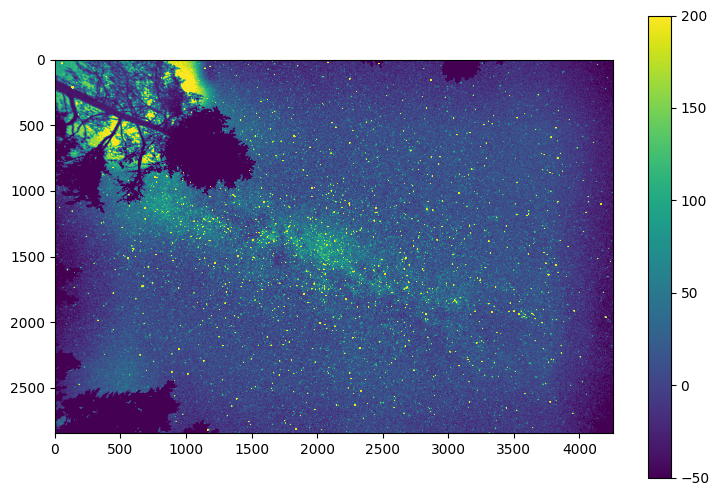

In [17]:
plt.figure(figsize=[9, 6])
plt.imshow(subtracted, vmin=-50, vmax=200)
plt.colorbar()

print(np.max(subtracted))
section = subtracted[750:810,3320:3380]
print("Relative standard deviation of a smooth patch: ", np.std(section) / np.median(section))

Note that we have to be more lenient with parameters associated with the shape of the star (including the color normalization factors), and more strict with the threshold, peak and flux filtering. This is because the shape of any given star changes from frame to frame due to undersampling. Being too strict with the star shape may end up with the loss of a lot of stars along the multi-frame temporal sequence. 

In [18]:
# verify star detection
global_median = np.median(subtracted)
daofind = DAOStarFinder(fwhm=6.0, sky=global_median, threshold=400.,
                        sharplo=0.4, sharphi=1.0, 
                        roundlo=-0.5, roundhi=0.5)  
sources = daofind(subtracted)  

print(len(sources), global_median)

2893 -2.91755083893662


In [19]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,1610.5489269862883,0.21091508154960875,0.8555105785566717,-0.3534251797168321,-0.26537631055810246,49,-2.91755083893662,309.1305792543646,144.034420471475,-5.396165723892958
2,1707.5154830044387,0.6709490810753738,0.5989205920535853,0.3969034670870571,-0.09734886346832528,49,-2.91755083893662,355.39267261953665,144.5722656300686,-5.40021246754365
3,1629.0714004899196,3.2206171631904765,0.5127294560590787,0.45403288826503846,0.09024355580176008,49,-2.91755083893662,377.24630813850257,144.81285879881005,-5.402017817936987
4,2061.5208456699092,4.641412801673737,0.5860631712653376,0.20476364332737662,-0.06909461523648709,49,-2.91755083893662,386.8118135705791,144.6814953031428,-5.4010324715148705
5,2932.5894298603434,5.851579525077549,0.4376531132511089,-0.2375197952261494,-0.019999356098429826,49,-2.91755083893662,187.4123934119254,144.10871228276073,-5.396725593637182
6,1982.7742551798256,12.269718504107653,0.926102278844784,0.13742508522828933,0.29067538964712497,49,-2.91755083893662,1340.8081697087753,147.07569794424873,-5.4188522949964355
7,3263.4754756569646,12.032784007719396,0.8360520816721787,-0.10225913985928414,-0.1380855844897034,49,-2.91755083893662,436.157566773141,144.72217995911444,-5.401337739263924
8,4209.435745114861,13.642574286879677,0.6329562588372106,-0.1916857797480386,-0.15145261381370279,49,-2.91755083893662,483.8942681478695,145.078309735426,-5.40400621775256
9,2766.8180535416036,15.458962789577459,0.8960429075961408,0.11037227336842156,0.02301258059995049,49,-2.91755083893662,384.86468830789664,144.2045519790979,-5.397447423985607


In [20]:
# filter rows
#
# these threshold values were found by trial and error. Maybe a better way would be to optimize them (and
# perhaps the daofind threshold) with the goal of getting a reasonable number of star detections, say ~2000.

c = sources[sources['flux'] > 30.]
clean_sources = c[c['peak'] > 30.]

In [21]:
clean_sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,1610.5489269862883,0.21091508154960875,0.8555105785566717,-0.3534251797168321,-0.26537631055810246,49,-2.91755083893662,309.1305792543646,144.034420471475,-5.396165723892958
2,1707.5154830044387,0.6709490810753738,0.5989205920535853,0.3969034670870571,-0.09734886346832528,49,-2.91755083893662,355.39267261953665,144.5722656300686,-5.40021246754365
3,1629.0714004899196,3.2206171631904765,0.5127294560590787,0.45403288826503846,0.09024355580176008,49,-2.91755083893662,377.24630813850257,144.81285879881005,-5.402017817936987
4,2061.5208456699092,4.641412801673737,0.5860631712653376,0.20476364332737662,-0.06909461523648709,49,-2.91755083893662,386.8118135705791,144.6814953031428,-5.4010324715148705
5,2932.5894298603434,5.851579525077549,0.4376531132511089,-0.2375197952261494,-0.019999356098429826,49,-2.91755083893662,187.4123934119254,144.10871228276073,-5.396725593637182
6,1982.7742551798256,12.269718504107653,0.926102278844784,0.13742508522828933,0.29067538964712497,49,-2.91755083893662,1340.8081697087753,147.07569794424873,-5.4188522949964355
7,3263.4754756569646,12.032784007719396,0.8360520816721787,-0.10225913985928414,-0.1380855844897034,49,-2.91755083893662,436.157566773141,144.72217995911444,-5.401337739263924
8,4209.435745114861,13.642574286879677,0.6329562588372106,-0.1916857797480386,-0.15145261381370279,49,-2.91755083893662,483.8942681478695,145.078309735426,-5.40400621775256
9,2766.8180535416036,15.458962789577459,0.8960429075961408,0.11037227336842156,0.02301258059995049,49,-2.91755083893662,384.86468830789664,144.2045519790979,-5.397447423985607


In [22]:
# statistics
print("Mean roundness: ", np.average(clean_sources['roundness1']), "stdev: ", np.std(clean_sources['roundness1']))
print("Mean sharpness: ", np.average(clean_sources['sharpness']), "stdev: ", np.std(clean_sources['sharpness']))

Mean roundness:  -0.0021537979302251936 stdev:  0.23710718523658078
Mean sharpness:  0.7346721238107793 stdev:  0.16813137325728617


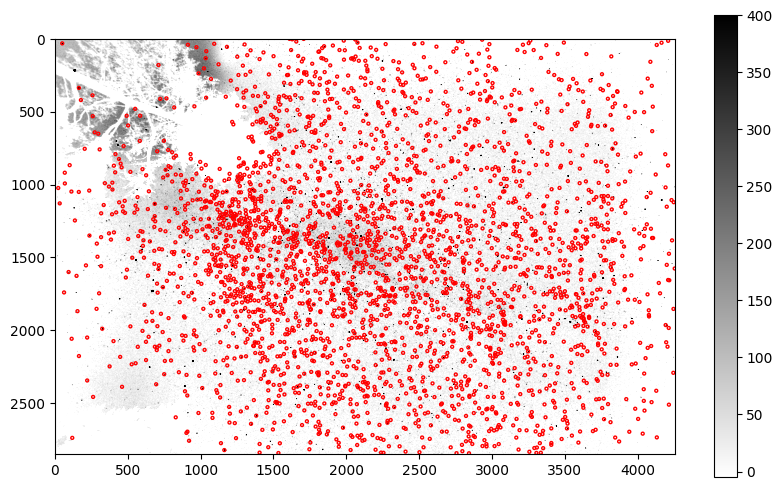

In [23]:
positions = [(x,y) for x,y in zip(clean_sources['xcentroid'], clean_sources['ycentroid'])]
apertures = CircularAperture(positions, r=10.)
plt.figure(figsize=[10, 6])
plt.imshow(subtracted, vmin=-5, vmax=400, cmap=cm.binary)
plt.colorbar()
ap = apertures.plot(color='red')

We use this plot to find the "best" parameters for the procedure. We like to see that (i) there are no false positives, that is, circles with no apparent star in the center, (ii) there is adequate coverage of the entire frame, and (iii) there is a mostly small amount of detections in which the circle contains more than one star, or a star not well centered. We presume that these will be thrown out when the procedure runs on a multi-image data set.
